## TUTORIAL COMO ABRIR EL DATA SET
- Descargar el zip de los data set por el ds
- Descargar este ipynb y ponerlo en la misma carpeta de los csv
- Descomprimirlos
- No cambiarle el nombre a los csv
- Abrir el entorno virtual, comandos en el README
- Disfruta


In [3]:
import pandas as pd

df_min = pd.read_csv('User0_credit_card_transactions.csv')
df_max = pd.read_csv('credit_card_transactions-ibm_v2.csv') 
df_cards = pd.read_csv('sd254_cards.csv')
df_users = pd.read_csv('sd254_users.csv')

In [6]:
%pip install matplotlib
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('bmh')

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Graficos cagones y sin sentido

Agrupamos el dataset por su valor de atributo "Use Chip" y visualizamos la primera fila de cada grupo

In [4]:
df_users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


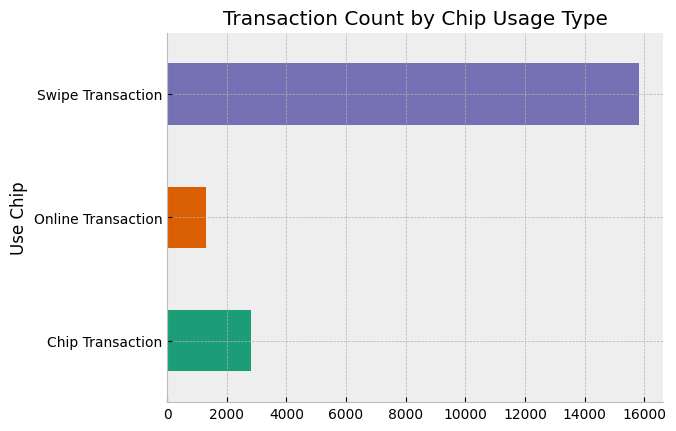

In [7]:
df_a = df_min.groupby('Use Chip').size()
ax = df_a.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

ax.set_title('Transaction Count by Chip Usage Type')

plt.gca().spines[['top', 'right',]].set_visible(False)


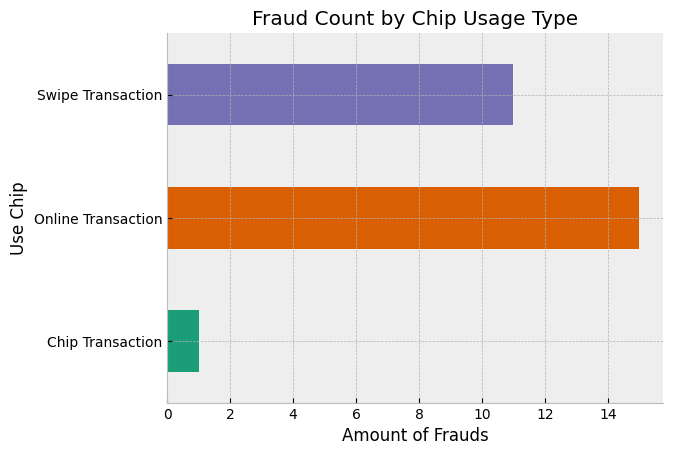

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where "Is Fraud?" is "Yes"
df_a  = df_min.loc[(df_min['Is Fraud?']=='Yes')]
df_a = df_a.groupby('Use Chip').size()

ax = df_a.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

ax.set_title('Fraud Count by Chip Usage Type')
ax.set_xlabel('Amount of Frauds')

plt.gca().spines[['top', 'right',]].set_visible(False)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Ale\AppData\Local\Temp\ipykernel_11420\905863342.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_min['Amount'] = df_min['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\Ale\AppData\Local\Temp\ipykernel_11420\905863342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Amount_binned'] = pd.cut(df_a['Amount'], bins=bins)


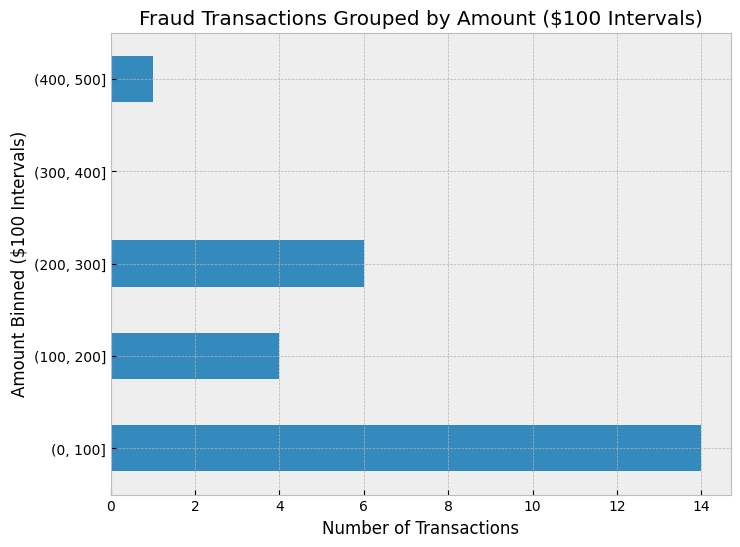

In [10]:
# chatgpt grafico peor q el mio
df_min['Amount'] = df_min['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_a = df_min.loc[df_min['Is Fraud?'] == 'Yes']

bins = range(0, int(df_a['Amount'].max()) + 100, 100)

df_a['Amount_binned'] = pd.cut(df_a['Amount'], bins=bins)

amount_counts = df_a['Amount_binned'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6))

amount_counts.plot(kind='barh', ax=ax)

ax.set_title('Fraud Transactions Grouped by Amount ($100 Intervals)')
ax.set_xlabel('Number of Transactions')
ax.set_ylabel('Amount Binned ($100 Intervals)')

plt.show()

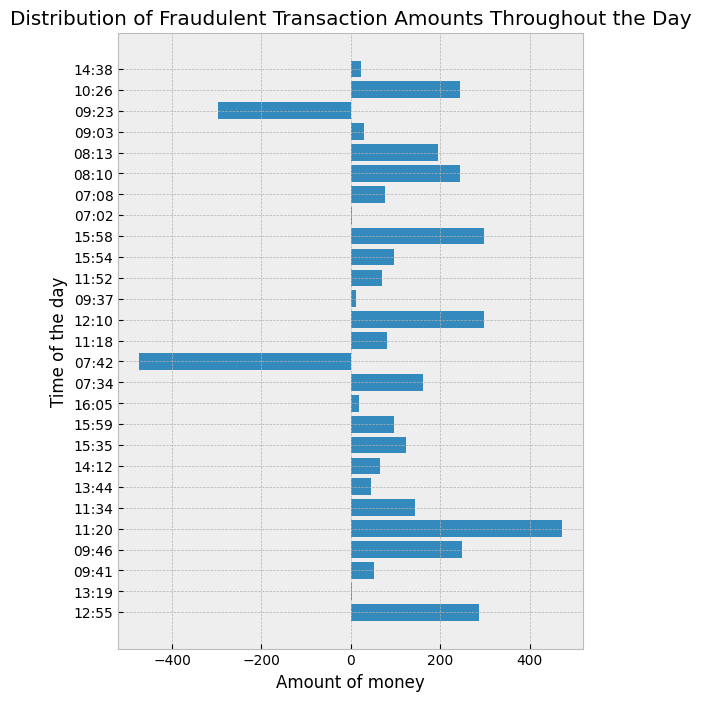

In [11]:
df_a = df_min.loc[(df_min['Is Fraud?']=='Yes')]

fig, ax = plt.subplots(figsize=(6, 8))

ax.barh(df_a.Time, df_a['Amount'])

ax.set_title('Distribution of Fraudulent Transaction Amounts Throughout the Day')
ax.set_xlabel('Amount of money')
ax.set_ylabel('Time of the day')

plt.show()